In [1]:
import eikon as ek
import datetime as dt
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
import pandas as pd
import numpy as np

ek.set_app_key('89915a3b58874e1599870c6ecc45d6edd6344f8c')

In [70]:
start_date = dt.date(2000,1,1)
end_date = dt.date(2023,1,1)
dates_days = [start_date]
i = 0
while (date := start_date + relativedelta(days=i+1)) <= end_date:
    dates_days.append(date)
    i +=1

In [11]:
instruments = pd.read_csv(r'C:\Users\hugo.perezdealbeniz\Desktop\Ranking DIP European Equities\ReutersEikon\data\Final Data\constituents_lists.csv').iloc[:,0].tolist()

In [12]:
fields = ['TR.PriceClose','TR.PriceClose.date']

In [92]:
complete_df = pd.DataFrame(columns=['Instrument','Date','CallDate'])

errors_dict = {}

for i in tqdm(range(len(str_dates[:-1])),smoothing=0):
    date = str_dates[i]
    try:
        returned_df,err = ek.get_data(instruments,fields,parameters={'SDate':date,'EDate':str_dates[i+1],'Frq':'D','Curn':'EUR'})
    except Exception as x:
        print('failed for '+ date)
        errors_dict[date] = x
    else:
        returned_df['CallDate'] = date
        complete_df = pd.concat([complete_df,returned_df],axis=0)

if not not errors_dict:
    for date in tqdm(list(errors_dict.keys()),smoothing=0):
        edate = str((dt.datetime.strptime(date, r'%Y-%m-%d') + dateutil.relativedelta.relativedelta(months=1)).date())
        try:
            returned_df,err = ek.get_data(instruments,fields,parameters={'SDate':date,'EDate':edate,'Frq':'D','Curn':'EUR'})
        except Exception as x:
            print('failed again for '+ date)
            errors_dict[date] = x
        else:
            returned_df['CallDate'] = date
            complete_df = pd.concat([complete_df,returned_df],axis=0)

100%|██████████| 276/276 [1:16:20<00:00, 16.60s/it]


In [55]:
complete_df = pd.read_csv('raw_complete_price.csv')

C:\Users\hugo.perezdealbeniz\AppData\Local\Temp\ipykernel_11624\1470608352.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  complete_df = pd.read_csv('raw_complete_price.csv')


In [56]:
complete_df['Price Close'].isna().sum()/len(complete_df)

0.015327845139295993

In [57]:
complete_df.sort_values('Date')

,Instrument,Date,CallDate,Price Close,Unnamed: 4,TR.PRICECLOSE,TR.PRICECLOSE.DATE
80542,ARG.MC^A00,1996-03-19T00:00:00Z,2000-04-01,5240.0,NaN,NaN,NaN
6159372,ARG.MC^A00,1996-03-19T00:00:00Z,2017-09-01,5240.0,NaN,NaN,NaN
6159373,ARG.MC^A00,1996-03-19T00:00:00Z,2017-09-01,5240.0,NaN,NaN,NaN
6159374,ARG.MC^A00,1996-03-19T00:00:00Z,2017-09-01,5240.0,NaN,NaN,NaN
6159375,ARG.MC^A00,1996-03-19T00:00:00Z,2017-09-01,5240.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8246196,RUKN.VX^L11,NaN,2022-12-01,NaN,NaN,NaN,NaN
8249744,BHM.L^I04,NaN,2022-12-01,NaN,NaN,NaN,NaN
8250843,KID.L^D05,NaN,2022-12-01,NaN,NaN,NaN,NaN
8254075,KONBS.HE^F05,NaN,2022-12-01,NaN,NaN,NaN,NaN


In [58]:
tmp_pivoted = complete_df.drop_duplicates(['Instrument','Date','Price Close']).pivot(index='Date',columns='Instrument',values='Price Close')

<AxesSubplot: xlabel='Date'>

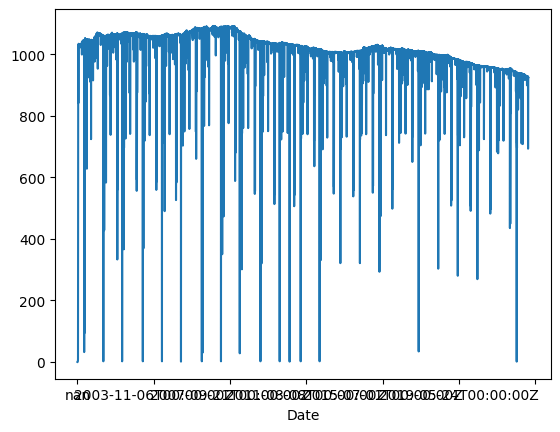

In [59]:
tmp_pivoted.notna().sum(axis=1).plot()

In [121]:
dates_to_retry = tmp_pivoted.dropna(how='all',axis=1).dropna(how='all',axis=0).loc[tmp_pivoted.notna().sum(axis=1)<900].index.tolist()

In [124]:
dates_to_retry = list(map(lambda x: x[:10],dates_to_retry))

In [143]:
dates_to_retry += ['2023-01-01']

In [144]:
dates_to_retry

['1996-03-19',
 '1999-08-16',
 '1999-12-08',
 '1999-12-16',
 '1999-12-21',
 '1999-12-22',
 '1999-12-29',
 '1999-12-30',
 '2000-01-03',
 '2000-01-06',
 '2000-04-21',
 '2000-04-24',
 '2000-05-01',
 '2000-05-29',
 '2000-06-01',
 '2000-06-12',
 '2000-08-28',
 '2001-04-13',
 '2001-05-01',
 '2001-05-07',
 '2001-05-24',
 '2001-05-28',
 '2001-06-04',
 '2001-08-15',
 '2001-08-27',
 '2001-12-24',
 '2001-12-31',
 '2002-03-29',
 '2002-05-01',
 '2002-05-06',
 '2002-05-09',
 '2002-06-03',
 '2002-06-04',
 '2002-08-15',
 '2002-08-26',
 '2002-12-24',
 '2002-12-31',
 '2003-01-06',
 '2003-04-18',
 '2003-05-01',
 '2003-05-05',
 '2003-05-26',
 '2003-05-29',
 '2003-06-09',
 '2003-08-15',
 '2003-08-25',
 '2003-12-24',
 '2003-12-31',
 '2004-01-06',
 '2004-04-09',
 '2004-05-03',
 '2004-05-20',
 '2004-05-31',
 '2004-08-30',
 '2004-12-24',
 '2004-12-27',
 '2004-12-28',
 '2004-12-31',
 '2005-01-03',
 '2005-01-06',
 '2005-03-25',
 '2005-05-02',
 '2005-05-05',
 '2005-05-30',
 '2005-08-29',
 '2005-12-27',
 '2006-01-

In [147]:
retry_df = pd.DataFrame(columns=['CallDate','Instrument','Date','Price Close'])
errors_dict = {}

for date in tqdm(dates_to_retry,smoothing=0):
    try:
        returned_df,err = ek.get_data(instruments,fields,parameters={'SDate':date,'Curn':'EUR'})
    except Exception as x:
        print('failed for '+ date)
        errors_dict[date] = x
    else:
        returned_df['CallDate'] = date
        retry_df = pd.concat([retry_df,returned_df],axis=0)

if not not errors_dict:
    for date in tqdm(dates_to_retry,smoothing=0):
        try:
            returned_df,err = ek.get_data(instruments,fields,parameters={'SDate':date,'Curn':'EUR'})
        except Exception as x:
            print('failed again for '+ date)
            errors_dict[date] = x
        else:
            returned_df['CallDate'] = date
            retry_df = pd.concat([retry_df,returned_df],axis=0)

 10%|▉         | 23/241 [02:17<21:41,  5.97s/it]2023-03-07 09:49:47,285 P[18504] [MainThread 9560] UDF Core request failed. Gateway Time-out
2023-03-07 09:49:47,286 P[18504] [MainThread 9560] HTTP request failed: EikonError-UDF Core request failed. Gateway Time-out
 10%|▉         | 24/241 [02:36<23:39,  6.54s/it]

failed for 2001-08-15


 57%|█████▋    | 138/241 [21:42<16:12,  9.44s/it]2023-03-07 10:09:11,748 P[18504] [MainThread 9560] Backend error. 400 Bad Request
2023-03-07 10:09:11,749 P[18504] [MainThread 9560] HTTP request failed: EikonError-Backend error. 400 Bad Request
 58%|█████▊    | 139/241 [22:01<16:09,  9.51s/it]

failed for 2013-05-27


 20%|██        | 49/241 [04:43<18:30,  5.78s/it]


KeyboardInterrupt: 

In [150]:
for date in tqdm(list(errors_dict.keys()),smoothing=0):
    try:
        returned_df,err = ek.get_data(instruments,fields,parameters={'SDate':date,'Curn':'EUR'})
    except Exception as x:
        print('failed for '+ date)
    else:
        returned_df['CallDate'] = date
        retry_df = pd.concat([retry_df,returned_df],axis=0)

100%|██████████| 2/2 [00:25<00:00, 12.86s/it]


In [60]:
retry_df = pd.read_csv('retry_df_1.csv')

<AxesSubplot: xlabel='CallDate'>

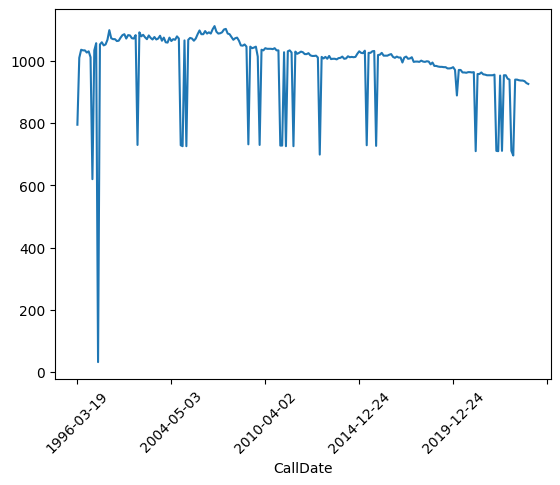

In [61]:
retry_pivoted = retry_df.drop_duplicates(['Instrument','Date','Price Close']).pivot(index='CallDate',columns='Instrument',values='Price Close')
retry_pivoted.dropna(how='all',axis=1).dropna(how='all',axis=0).notna().sum(axis=1).plot(rot=45)

In [154]:
len(dates_to_retry)

241

In [178]:
retry_pivoted

Instrument,1COV.DE,1U1.DE,A2.MI,A3M.MC,AAAA.L^C21,AAH.AS^D08,AAK.ST,AAL.L,AALB.AS,AB.L^G07,...,YAR.OL,YIT.HE,YSO.LS,ZALG.DE,ZEL.MC^K15,ZIGGO.AS^L14,ZO1G.DE^A22,ZODC.PA^C18,ZOT.MC^E22,ZURN.S
CallDate,,,,,,,,,,,,,,,,,,,,,
1996-03-19,<NA>,<NA>,<NA>,<NA>,<NA>,9.075604,<NA>,<NA>,2.949571,7.693593,...,<NA>,0.939529,0.480272,<NA>,0.302559,<NA>,<NA>,3.262409,1.447795,169.709635
1999-08-16,<NA>,10.532114,2.077209,<NA>,<NA>,21.0,<NA>,14.211333,4.3875,12.536142,...,<NA>,1.610684,0.754585,<NA>,2.576475,<NA>,<NA>,3.95,3.282435,394.984574
1999-12-08,<NA>,7.208218,3.154791,<NA>,<NA>,23.5,<NA>,14.846024,4.0,9.613619,...,<NA>,1.862062,1.186127,<NA>,3.323536,<NA>,<NA>,4.16,3.027192,407.392389
1999-12-16,<NA>,7.198555,3.088676,<NA>,<NA>,23.69,<NA>,16.857333,4.525,9.725194,...,<NA>,2.029648,1.201939,<NA>,3.317653,<NA>,<NA>,4.26,2.920316,404.176233
1999-12-21,<NA>,6.966655,3.403464,<NA>,<NA>,24.52,<NA>,16.194144,4.8875,9.833122,...,<NA>,1.992407,1.263821,<NA>,3.245104,<NA>,<NA>,4.1,2.888542,403.124841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,30.24,15.99,1.158,2.772,<NA>,<NA>,15.330423,34.465231,37.55,<NA>,...,43.612566,3.282,1.015,23.36,<NA>,<NA>,<NA>,<NA>,<NA>,445.321196
2022-09-19,30.12,15.39,1.071,2.732,<NA>,<NA>,14.481696,32.116497,35.5,<NA>,...,39.912782,3.246,0.936,21.33,<NA>,<NA>,<NA>,<NA>,<NA>,444.627875
2022-12-06,36.93,13.15,1.313,3.418,<NA>,<NA>,16.014246,38.541653,38.69,<NA>,...,43.096315,2.722,0.9535,31.11,<NA>,<NA>,<NA>,<NA>,<NA>,458.427018


In [172]:
retry_df['Date'] = retry_df['Date'].apply(lambda x: x[:10])

In [173]:
retry_df

,CallDate,Instrument,Date,Price Close
0,1996-03-19,BKWB.S,,<NA>
1,1996-03-19,AGGK.L^H21,,<NA>
2,1996-03-19,BITTI.HE,,<NA>
3,1996-03-19,FIA_p.MI^E12,1996-03-19,5.692102
4,1996-03-19,CMIP.PA^C15,1996-03-19,59.606513
...,...,...,...,...
1578,2013-05-27,JM.ST,2013-05-27,16.984075
1579,2013-05-27,AGRP.L,,<NA>
1580,2013-05-27,TOP.CO,2013-05-27,19.625445
1581,2013-05-27,LEGD.PA,2013-05-27,38.46


In [175]:
tmp = retry_df.loc[retry_df.CallDate != retry_df.Date]
tmp.loc[tmp.Date != '']

,CallDate,Instrument,Date,Price Close
87,1996-03-19,MAUP.PA,1996-03-15,0.578361
196,1996-03-19,ZEL.MC^K15,1996-02-09,0.302559
277,1996-03-19,SNI.OL,1996-02-09,15.217062
287,1996-03-19,BOLL.PA,1996-03-15,0.144369
341,1996-03-19,ACS.MC,1996-03-18,1.37551
...,...,...,...,...
1559,2013-05-27,ADML.L,2013-05-24,11.500262
1562,2013-05-27,D1912a.CO^F03,2003-06-13,4582.445652
1565,2013-05-27,WMb.ST^K06,2006-11-24,2.866421
1566,2013-05-27,CEY.L,2013-05-24,0.448054


<AxesSubplot: xlabel='Date'>

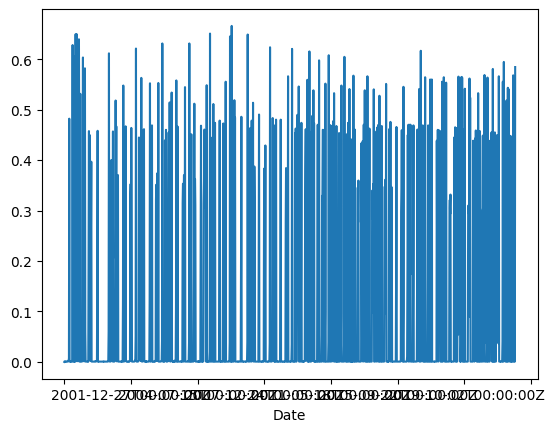

In [156]:
(retry_pivoted.notna().sum(axis=1)/1583).plot()

In [ ]:
tmp_pivoted.loc[dates_to_retry]

<AxesSubplot: xlabel='Date'>

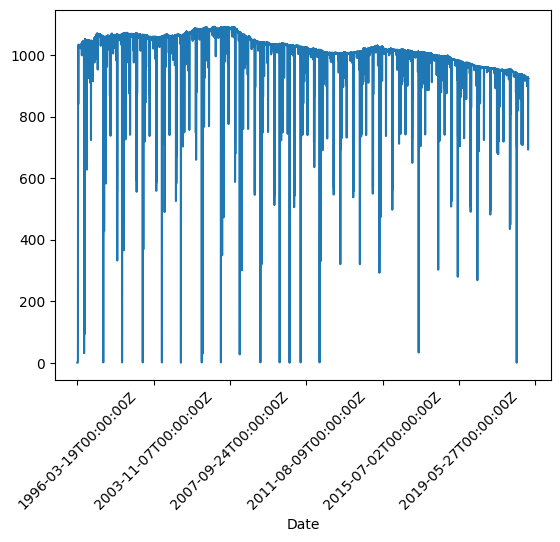

In [63]:
tmp_pivoted.dropna(how='all',axis=1).dropna(how='all',axis=0).notna().sum(axis=1).plot(rot=45)

In [ ]:
pd.notna()

In [64]:
tmp_pivoted = tmp_pivoted.dropna(how='all',axis=1).dropna(how='all',axis=0)

In [162]:
tmp_pivoted

Instrument,1COV.DE,1U1.DE,A2.MI,A3M.MC,AAAA.L^C21,AAH.AS^D08,AAK.ST,AAL.L,AALB.AS,AB.L^G07,...,YAR.OL,YIT.HE,YSO.LS,ZALG.DE,ZEL.MC^K15,ZIGGO.AS^L14,ZO1G.DE^A22,ZODC.PA^C18,ZOT.MC^E22,ZURN.S
Date,,,,,,,,,,,,,,,,,,,,,
1996-03-19T00:00:00Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1999-08-16T00:00:00Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1999-12-08T00:00:00Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1999-12-16T00:00:00Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1999-12-21T00:00:00Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23T00:00:00Z,36.33,11.46,1.259,3.14,<NA>,<NA>,15.817463,36.915984,36.99,<NA>,...,41.058373,2.436,0.94,32.66,<NA>,<NA>,<NA>,<NA>,<NA>,451.339617
2022-12-27T00:00:00Z,36.78,11.45,1.258,3.158,<NA>,<NA>,15.966044,<NA>,36.92,<NA>,...,41.342115,2.418,0.938,32.92,<NA>,<NA>,<NA>,<NA>,<NA>,454.226382
2022-12-28T00:00:00Z,36.94,11.56,1.2425,3.14,<NA>,<NA>,16.048986,37.212096,36.66,<NA>,...,40.770719,2.406,0.927,32.89,<NA>,<NA>,<NA>,<NA>,<NA>,453.830331


In [164]:
tmp_pivoted = tmp_pivoted.set_index(map(lambda x: x[:10], tmp_pivoted.index))

<AxesSubplot: >

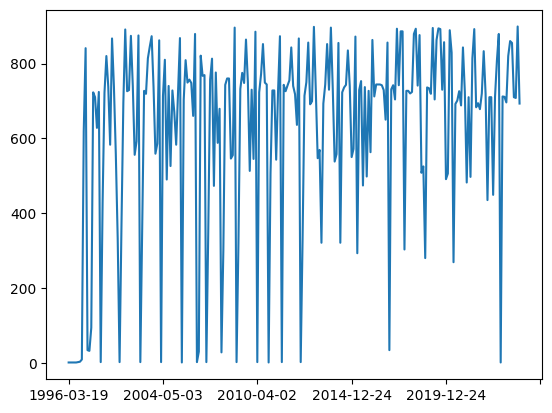

In [167]:
tmp_pivoted.loc[dates_to_retry[:-1]].notna().sum(axis=1).plot()

In [72]:
str_dates_days = list(map(str, dates_days))

In [65]:
sorted_complete_pivoted_df = tmp_pivoted[sorted(tmp_pivoted)]

In [66]:
sorted_retry = retry_pivoted[sorted_complete_pivoted_df.columns]

In [67]:
dates_dict = {}
for date,values in zip(sorted_complete_pivoted_df.index,sorted_complete_pivoted_df.values):
    dates_dict[date] = values

In [68]:
for date,values in zip(sorted_retry.index,sorted_retry.values):
    dates_dict[date] = values

In [73]:
missing_dates = list(set(str_dates_days) - set(dates_dict.keys()))

In [74]:
for date in tqdm(missing_dates):
    dates_dict[date] = np.nan

100%|██████████| 8169/8169 [00:00<00:00, 2047524.16it/s]


In [75]:
full_df = pd.DataFrame(dates_dict,index=sorted_complete_pivoted_df.columns).T

In [2]:
full_df = pd.read_csv('full_df.csv',index_col=0)

In [3]:
full_df = full_df.sort_index()

In [4]:
filled_df = full_df.fillna(method='ffill',limit=2)

<AxesSubplot: >

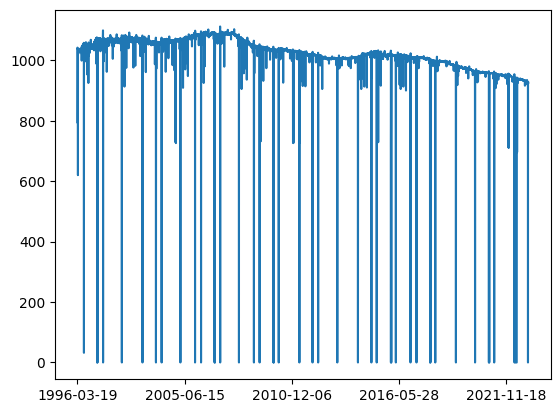

In [5]:
filled_df.notna().sum(axis=1).plot()

In [309]:
full_df.to_csv('full_df.csv')

In [6]:
dates_to_retry_2 = filled_df.loc[filled_df.notna().sum(axis=1)<800].index.tolist()

In [7]:
len(dates_to_retry_2)

106

In [13]:
retry_df_2 = pd.DataFrame(columns=['CallDate','Instrument','Date','Price Close'])
errors_dict = {}

for date in tqdm(dates_to_retry_2,smoothing=0):
    try:
        returned_df,err = ek.get_data(instruments,fields,parameters={'SDate':date,'Curn':'EUR'})
    except Exception as x:
        print('failed for '+ date)
        errors_dict[date] = x
    else:
        returned_df['CallDate'] = date
        retry_df_2 = pd.concat([retry_df_2,returned_df],axis=0)

if not not errors_dict:
    for date in tqdm(errors_dict.keys(),smoothing=0):
        try:
            returned_df,err = ek.get_data(instruments,fields,parameters={'SDate':date,'Curn':'EUR'})
        except Exception as x:
            print('failed again for '+ date)
            errors_dict[date] = x
        else:
            returned_df['CallDate'] = date
            retry_df_2 = pd.concat([retry_df_2,returned_df],axis=0)

100%|██████████| 106/106 [20:21<00:00, 11.52s/it]


In [54]:
retry_df_2.to_csv('retry_df_2.csv')

<AxesSubplot: xlabel='CallDate'>

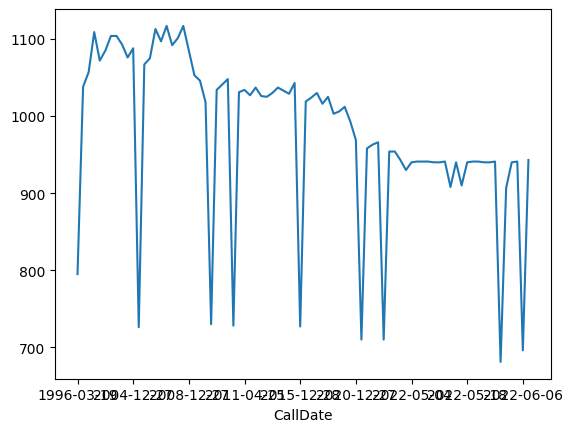

In [21]:
tmp = retry_df_2.drop_duplicates(['Date','Instrument']).pivot(index='CallDate',columns='Instrument',values='Price Close')
tmp.notna().sum(axis=1).plot()

In [23]:
full_df = pd.read_csv('full_df.csv',index_col=0)

<AxesSubplot: >

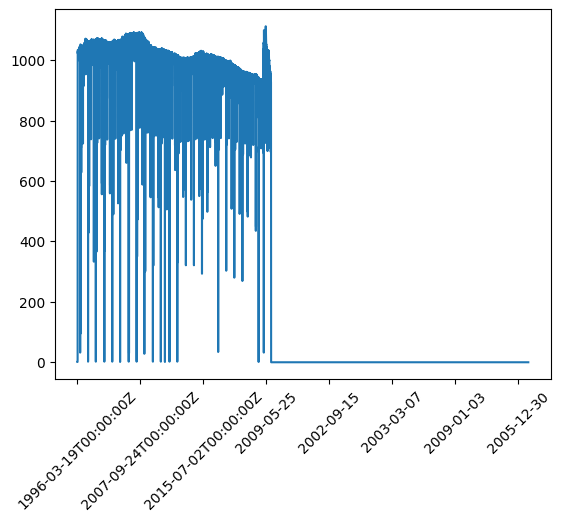

In [77]:
full_df.notna().sum(axis=1).plot(rot=45)

In [29]:
tmp = tmp[full_df.columns]

In [30]:
dates_dict = full_df.T.to_dict('series')

In [31]:
for date,values in zip(tmp.index,tmp.values):
    dates_dict[date] = values


In [36]:
tmp = pd.DataFrame(dates_dict).T

<AxesSubplot: >

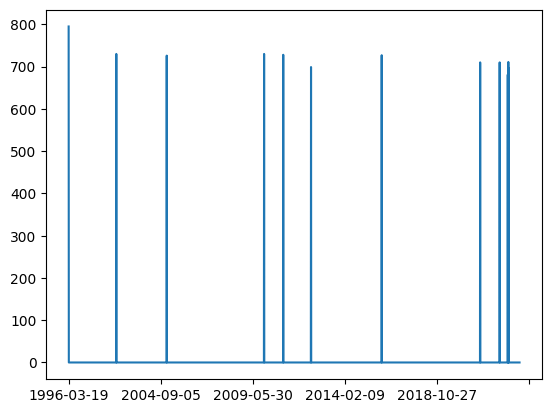

In [53]:
tmp.loc[tmp.notna().sum(axis=1) < 800].notna().sum(axis=1).plot()